In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_NE_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3,3
1,0.0,67.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0,7
2,1.0,57.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0,7
3,1.0,64.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1,7
4,0.0,74.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0,7
266,1.0,44.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0,7
267,0.0,56.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0,3
268,1.0,57.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0,6


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	5
float64		column 2	1
float64		column 3	3
float64		column 4	1
float64		column 5	2
float64		column 6	2
float64		column 7	3
float64		column 8	1
float64		column 9	2
float64		column 10	3
float64		column 11	1
int64		column 12	0
int64		column 13	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,265.000000,269.000000,267.000000,269.000000,268.000000,268.000000,267.000000,269.000000,268.000000,267.000000,269.000000,270.000000,270.000000
mean,0.686792,54.394052,3.168539,131.252788,249.738806,0.149254,1.018727,149.650558,0.328358,1.054682,1.583643,0.670370,4.696296
std,0.464676,9.103106,0.952669,17.831175,51.866572,0.357005,0.997942,23.204570,0.470495,1.149144,0.615011,0.943896,1.940659
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,212.750000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,281.250000,0.000000,2.000000,166.000000,1.000000,1.700000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

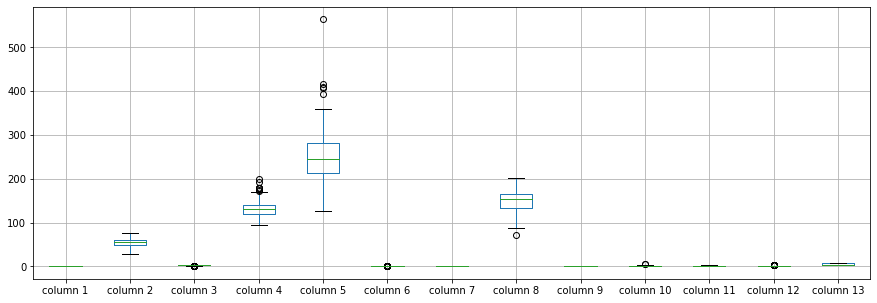

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.686792
column 2      54.394052
column 3       3.168539
column 4     131.252788
column 5     249.738806
column 6       0.149254
column 7       1.018727
column 8     149.650558
column 9       0.328358
column 10      1.054682
column 11      1.583643
column 12      0.670370
column 13      4.696296
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.087726,0.035702,-0.072960,-0.210977,0.053132,0.028809,-0.108758,0.181567,0.092919,0.064231,0.111539,0.395283
column 2,-0.087726,1.000000,0.090733,0.273306,0.222630,0.126499,0.119970,-0.407382,0.105496,0.197715,0.167659,0.352172,0.103539
column 3,0.035702,0.090733,1.000000,-0.031168,0.094209,-0.094040,0.067903,-0.317736,0.358813,0.179561,0.148218,0.224108,0.269711
column 4,-0.072960,0.273306,-0.031168,1.000000,0.174627,0.158481,0.112016,-0.038394,0.082997,0.225173,0.148459,0.089759,0.137231
column 5,-0.210977,0.222630,0.094209,0.174627,1.000000,0.024236,0.168897,-0.023126,0.086762,0.030924,-0.004283,0.131384,0.030394
column 6,0.053132,0.126499,-0.094040,0.158481,0.024236,1.000000,0.058698,0.016693,-0.001854,-0.026153,0.047414,0.127098,0.049065
column 7,0.028809,0.119970,0.067903,0.112016,0.168897,0.058698,1.000000,-0.072581,0.088857,0.115651,0.146634,0.106805,0.010514
column 8,-0.108758,-0.407382,-0.317736,-0.038394,-0.023126,0.016693,-0.072581,1.000000,-0.383137,-0.349882,-0.390400,-0.265855,-0.252774
column 9,0.181567,0.105496,0.358813,0.082997,0.086762,-0.001854,0.088857,-0.383137,1.000000,0.271715,0.251575,0.156299,0.332056
column 10,0.092919,0.197715,0.179561,0.225173,0.030924,-0.026153,0.115651,-0.349882,0.271715,1.000000,0.623022,0.255091,0.322840


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+65,13+65+65,13+65+65+65,13+65+65+65+65,13+65+65+65+65+65,13+65+65+65+65,13+65+65+65,13+65+65,13+65,13], vae_layer = False, seed = 65)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 607.6036033630371
Epoch: 1 , loss: 605.7021484375
Epoch: 2 , loss: 605.8181037902832
Epoch: 3 , loss: 606.2910461425781
Epoch: 4 , loss: 606.2639236450195
Epoch: 5 , loss: 605.9614715576172
Epoch: 6 , loss: 604.9934883117676
Epoch: 7 , loss: 605.7947654724121
Epoch: 8 , loss: 607.9898986816406
Epoch: 9 , loss: 606.7335472106934
Epoch: 10 , loss: 606.064697265625
Epoch: 11 , loss: 607.2253723144531
Epoch: 12 , loss: 605.7675552368164
Epoch: 13 , loss: 605.7033386230469
Epoch: 14 , loss: 604.262825012207
Epoch: 15 , loss: 601.876537322998
Epoch: 16 , loss: 599.3768424987793
Epoch: 17 , loss: 597.2558517456055
Epoch: 18 , loss: 595.8728446960449
Epoch: 19 , loss: 596.1549377441406
Epoch: 20 , loss: 594.5693550109863
Epoch: 21 , loss: 591.7243347167969
Epoch: 22 , loss: 588.7100677490234
Epoch: 23 , loss: 583.3022041320801
Epoch: 24 , loss: 572.7680244445801
Epoch: 25 , loss: 529.7922058105469
Epoch: 26 , 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0
column 2      48.0
column 3       2.0
column 4     130.0
column 5     245.0
column 6       0.0
column 7       2.0
column 8     180.0
column 9       0.0
column 10      0.2
column 11      2.0
column 12      0.0
column 13      3.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(289.77919486738415, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.05351661052480621

In [18]:
new_df.iloc[66,:]

column 1       1.0
column 2      51.0
column 3       4.0
column 4     140.0
column 5     261.0
column 6       0.0
column 7       2.0
column 8     186.0
column 9       1.0
column 10      0.0
column 11      1.0
column 12      0.0
column 13      3.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3,3
1,0.0,67.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0,7
2,1.0,57.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0,7
3,1.0,64.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1,7
4,0.0,74.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0,7
266,1.0,44.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0,7
267,0.0,56.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0,3
268,1.0,57.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0,6


In [20]:
imputations[-1].to_excel("Sheart_NE_1(imp).xlsx", index=False, header=False)